# Goal
The goal of this notebook is to extract the **kkanji.tar** file which results in an extraction of 1 folder with 3.832 subfolders which are named with the correspondent unicode name. Each subfolder consists of png files of the Kanji characters.

To make it easier to process and share the data, i converted all images into a NumPy ndarray and saved it as an npz file. Then I removed all characters which only have one example. As there is no official training / test dataset split, I used a 50/50 split using stratification to maintain the original structure.

# Initialization

In [ ]:
# Mount Google Drive
from google.colab import drive
import os
from os.path import join
ROOT = "/content/gdrive" # default for the drive
print(ROOT)
drive.mount(ROOT)

/content/gdrive
Mounted at /content/gdrive


In [ ]:
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# tqdm_notebook
from tqdm import tqdm_notebook

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import resample,shuffle

# NumPy
import numpy as np
from numpy import savez_compressed

# pandas
import pandas as pd

# Path
from pathlib import Path

# Images
from PIL import Image, ImageOps

In [ ]:
# path definieren
path = Path('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project')

# Uncompress a tar file in python

In [ ]:
import tarfile

In [ ]:
fname = ROOT + "/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/kkanji.tar"

In [ ]:
tar = tarfile.open(fname) # Open for reading with gzip compression.
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7fd02e81ce50>>

## Loop over png files

In [ ]:
import pathlib
my_dir = "/content/kkanji2"

imgs = np.zeros((64,64), np.uint8).reshape(1,64,64) #Dummy black image to setup the ndarray
labels = np.array(['XXX'])

for item in pathlib.Path(my_dir).glob('**/*.png'):
  image = np.array(Image.open(item)).reshape(1,64,64)
  imgs = np.concatenate([imgs,image])
  parent = os.path.dirname(item).split('/')[-1]
  labels = np.concatenate([labels,np.array([parent])])

# Delete the dummy picture
imgs = np.delete(imgs,0,0)
labels = np.delete(labels,0,0)


In [ ]:
# Speichern
savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/kkanj-imgs.npz', imgs)
savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/kkanji-labels.npz', labels)

# Load and test the data

In [ ]:
# Load Function
def load(f):
    return np.load(f, allow_pickle=True)['arr_0']

In [ ]:
# Load the data
X = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/01_kkanji/kkanji-imgs.npz')
y = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/01_kkanji/kkanji-labels.npz') 

In [ ]:
print(f"Training Images: {X.shape}")
print(f"Training Labels: {y.shape}")

Training Images: (140424, 64, 64)
Training Labels: (140424,)


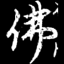

In [ ]:
testImage = 31004
Image.fromarray(X[testImage])

In [ ]:
y[testImage]

'U+4F5B'

# Dataset reduction

In [ ]:
# Create a DataFrame with unicode and occurrence
unicode = pd.DataFrame(y,columns=['unicode'])
values = pd.DataFrame(unicode.value_counts(),columns=['occurrence'])
df = pd.merge(unicode,values,on ='unicode')
df

,unicode,occurrence
0,U+610F,107
1,U+610F,107
2,U+610F,107
3,U+610F,107
4,U+610F,107
...,...,...
140419,U+7FF0,4
140420,U+7FF0,4
140421,U+7FF0,4
140422,U+8881,2


In [ ]:
# Indexes with occurrence > 1
select_indices = list(np.where(df['occurrence'] > 1)[0])
len(select_indices)

139609

In [ ]:
# Reduce the dataset. Characters with occurrence of only 1 are excluded
X_reduced = X[select_indices]
y_reduced = y[select_indices]

In [ ]:
print(f"X_reduced shape: {X_reduced.shape}")
print(f"y_reduced shape: {y_reduced.shape}")

X_reduced shape: (139609, 64, 64)
y_reduced shape: (139609,)


# Train-Test Split

In [ ]:
# split imbalanced dataset into train and test sets with stratification
testSize = 0.5
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=testSize, random_state=1, stratify=y_reduced)

In [ ]:
print(f"Training Images: {x_train.shape}")
print(f"Test Images: {x_test.shape}", )

Training Images: (69804, 64, 64)
Test Images: (69805, 64, 64)


In [ ]:
print(f"Unique Kanji characters (Training): \t {np.unique(y_train).size}")
print(f"Unique Kanji characters (Test): \t {np.unique(y_test).size}")

Unique Kanji characters (Training): 	 3017
Unique Kanji characters (Test): 	 3017


In [ ]:
#savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/08_kkanjiSmall/kkanjiSmall-train-imgs.npz', x_train)
#savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/08_kkanjiSmall/kkanjiSmall-train-labels.npz', y_train)

#savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/08_kkanjiSmall/kkanjiSmall-test-imgs.npz', x_test)
#savez_compressed('/content/drive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/08_kkanjiSmall/kkanjiSmall-test-labels.npz', y_test)